<a href="https://colab.research.google.com/github/yoboiwatsup/MachineLearning/blob/main/UTS/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/RegresiUTSTelkom.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path,header=None)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


     0         1         2         3         4         5         6         7   \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         8         9   ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

         86         87    

In [4]:
# Memberikan nama kolom
df.columns = [f"x{i+1}" for i in range(df.shape[1])]

print(df.head())


     x1        x2        x3        x4        x5        x6        x7        x8  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         x9       x10  ...       x82        x83       x84       x85       x86  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

        x87        x88    

In [5]:
# Melihat total baris dan kolom
df.shape

(515345, 91)

In [6]:
# Nama-nama Kolom
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91'],
      dtype='object')

In [7]:
# Tipe data
df.dtypes

,0
x1,int64
x2,float64
x3,float64
x4,float64
x5,float64
...,...
x87,float64
x88,float64
x89,float64
x90,float64


In [8]:
# Mengecek kolom apa saja yang bertipe float64
int_columns = df.dtypes[df.dtypes == 'float64'].index
print(int_columns)

Index(['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32',
       'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42',
       'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52',
       'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62',
       'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72',
       'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91'],
      dtype='object')


In [9]:
# Mengganti kolom pertama menjadi Tahun
df = df.rename(columns={'x1':'Year',})
df.tail()

,Year,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


In [10]:
sumna = df.isna().sum()

# Memfilter kolom dengan value yang kosong
columns_with_nan = sumna[sumna > 0]

print(columns_with_nan)


Series([], dtype: int64)


In [11]:
df['Year'].value_counts()

,count
Year,
2007,39404
2006,37534
2005,34952
2008,34760
2009,31038
...,...
1925,7
1922,6
1933,6


Text(0, 0.5, 'Count')

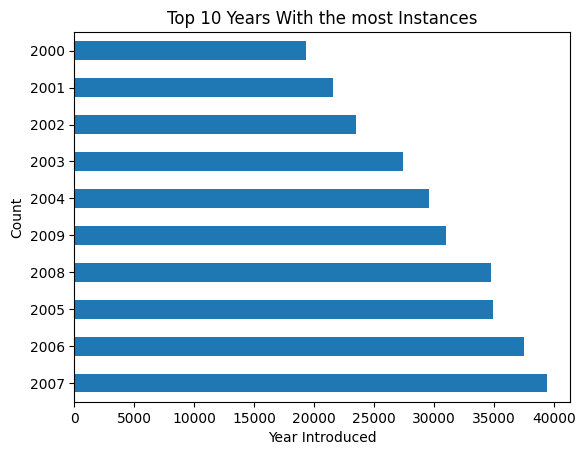

In [12]:
ax = df['Year'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top 10 Years With the most Instances')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

In [13]:
# df_corr = df[['Year','x2','x3','x4','x5','x91','x90','x89','x88','x87']].dropna().corr()
df_corr = df[['Year','x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91']].corr()
df_corr

,Year,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91
Year,1.000000,0.225374,0.021402,-0.139541,-0.003286,0.019338,-0.187443,0.110460,-0.034977,-0.024796,...,-0.040069,0.002492,0.014041,0.027610,0.059477,-0.053548,0.024589,-0.037432,0.008380,-0.056485
x2,0.225374,1.000000,0.561747,0.245415,0.022270,-0.283635,-0.267820,0.170659,-0.057822,0.218736,...,-0.359808,0.190359,-0.137876,0.030790,0.130742,-0.025499,0.048367,-0.145238,-0.105449,-0.183504
x3,0.021402,0.561747,1.000000,0.018479,0.126845,-0.184864,-0.112388,0.115468,0.108088,0.126086,...,-0.289733,0.053480,-0.151313,0.022337,0.150309,0.048165,-0.004499,-0.015567,-0.121116,-0.159893
x4,-0.139541,0.245415,0.018479,1.000000,0.152488,-0.131741,0.040808,-0.057642,0.080881,0.043885,...,0.070644,0.172473,0.109202,-0.007989,-0.033774,-0.093817,0.078392,-0.060559,-0.099712,0.094694
x5,-0.003286,0.022270,0.126845,0.152488,1.000000,0.034988,0.321159,0.282162,0.031649,-0.037905,...,-0.018894,-0.090732,0.043403,0.058974,-0.067529,0.041973,0.031072,0.248128,0.034055,0.011724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x87,-0.053548,-0.025499,0.048165,-0.093817,0.041973,0.004524,0.211509,-0.017750,-0.028124,0.012582,...,-0.023269,-0.139944,0.081741,0.088437,0.055266,1.000000,0.009603,0.152288,0.152311,-0.010400
x88,0.024589,0.048367,-0.004499,0.078392,0.031072,-0.006359,-0.038859,0.016209,0.013734,0.060279,...,0.048025,-0.014376,0.145660,0.329289,0.005876,0.009603,1.000000,0.012255,0.108086,0.249920
x89,-0.037432,-0.145238,-0.015567,-0.060559,0.248128,-0.016779,0.146493,0.068457,0.047882,-0.010335,...,0.078496,0.027713,0.273890,0.005454,-0.215873,0.152288,0.012255,1.000000,0.065642,0.224785
x90,0.008380,-0.105449,-0.121116,-0.099712,0.034055,0.006124,-0.018272,0.079342,0.000330,-0.007362,...,0.101536,-0.055384,0.046201,0.061739,-0.035505,0.152311,0.108086,0.065642,1.000000,0.199018


In [14]:
# Filter the correlation matrix
filtered_corr = df_corr[(df_corr > 0.5) | (df_corr < -0.2)]

# Drop rows and columns that contain only NaN values
filtered_corr = filtered_corr.dropna(how='all', axis=0)  # Drop rows with all NaN
filtered_corr = filtered_corr.dropna(how='all', axis=1)  # Drop columns with all NaN

# Display the filtered matrix
print(filtered_corr)

      Year        x2        x3   x4   x5        x6       x7  x8  x9  x10  ...  \
Year   1.0       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x2     NaN  1.000000  0.561747  NaN  NaN -0.283635 -0.26782 NaN NaN  NaN  ...   
x3     NaN  0.561747  1.000000  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x4     NaN       NaN       NaN  1.0  NaN       NaN      NaN NaN NaN  NaN  ...   
x5     NaN       NaN       NaN  NaN  1.0       NaN      NaN NaN NaN  NaN  ...   
...    ...       ...       ...  ...  ...       ...      ...  ..  ..  ...  ...   
x87    NaN       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x88    NaN       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x89    NaN       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x90    NaN       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   
x91    NaN       NaN       NaN  NaN  NaN       NaN      NaN NaN NaN  NaN  ...   

           x82  x83  x84  x

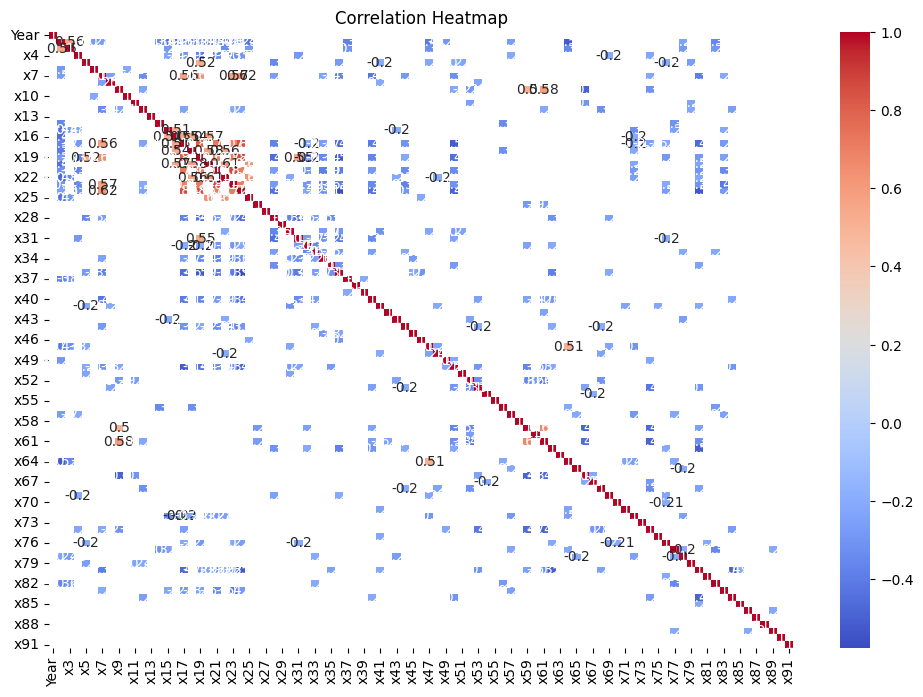

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Deskripsi Statistic
df.describe().loc[['min','50%','mean','max','std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Year,1922.000000,2002.000000,1998.397082,2011.000000,10.931046
x2,1.749000,44.258500,43.387126,61.970140,6.067558
x3,-337.092500,8.417850,1.289554,384.065730,51.580351
x4,-301.005060,10.476320,8.658347,322.851430,35.268585
x5,-154.183580,-0.652840,1.164124,335.771820,16.322790
x6,-181.953370,-6.007770,-6.553601,262.068870,22.860785
x7,-81.794290,-11.188390,-9.521975,166.236890,12.857751
x8,-188.214000,-2.046670,-2.391089,172.402680,14.571873
x9,-72.503850,-1.736450,-1.793236,126.741270,7.963827
x10,-126.479040,3.822310,3.727876,146.297950,10.582861


In [17]:
# Data split
selected_columns = ['x3', 'x9', 'x15', 'x16', 'x17', 'x19', 'x20', 'x21', 'x22',
                    'x23', 'x24', 'x25', 'x47', 'x57', 'x61', 'x64']

# Create a new DataFrame with only these columns
X = df[selected_columns]
y = df['Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Polynomial Regression Pipeline
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(random_state=42))
])

# k-NN Pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(random_state=42))
])

In [ ]:


# Pipeline untuk Polynomial Regression
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Hyperparameter tuning
param_grid_poly = {
    'poly_features__degree': [1, 2, 3, 4]  # Coba derajat polinomial
}

# **Subset Data** untuk mengurangi beban komputasi
X_tuning = X_train.sample(frac=0.2, random_state=42)  # Gunakan 20% data untuk tuning
y_tuning = y_train.loc[X_tuning.index]  # Pastikan target data sesuai dengan subset X_tuning

grid_search_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=3, scoring='r2', verbose=1)
grid_search_poly.fit(X_tuning, y_tuning)  # Fit pada subset data

# Menampilkan hasil terbaik
print("Polynomial Regression - Best Parameters:", grid_search_poly.best_params_)
print("Polynomial Regression - Best Score:", grid_search_poly.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Polynomial Regression - Best Parameters: {'poly_features__degree': 2}
Polynomial Regression - Best Score: 0.06079721903879546


In [ ]:


# Hyperparameter tuning untuk Decision Tree
param_grid = {
    'model__max_depth': [3, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10}
Best Score: 0.06892605884283712


In [ ]:
# Parameter grid untuk k-NN
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],  # Jumlah tetangga
    'model__weights': ['uniform', 'distance'],  # Jenis pembobotan
    'model__p': [1, 2]  # Jarak: 1=Manhattan, 2=Euclidean
}

# GridSearchCV untuk k-NN
grid_search_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=3,  # Cross-validation 5-fold
    scoring='r2',  # Skor evaluasi
    verbose=1,
    n_jobs=-1  # Paralelkan semua CPU
)

# Fit pada training data
grid_search_knn.fit(X_tuning, y_tuning)

# Menampilkan hasil terbaik
print("k-NN - Best Parameters:", grid_search_knn.best_params_)
print("k-NN - Best Score:", grid_search_knn.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
k-NN - Best Parameters: {'model__n_neighbors': 7, 'model__p': 2, 'model__weights': 'distance'}
k-NN - Best Score: 0.00932140934368079


In [ ]:


# XGBoost Model
xgb_model = XGBRegressor(random_state=42)

# Parameter grid untuk XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [3, 5, 7],  # Kedalaman maksimum pohon
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0],  # Rasio data untuk setiap pohon
    'colsample_bytree': [0.8, 1.0]  # Rasio fitur untuk setiap pohon
}

# GridSearchCV untuk XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,  # Cross-validation 5-fold
    scoring='r2',  # Skor evaluasi
    verbose=1,
    n_jobs=-1  # Paralelkan semua CPU
)

# Fit pada training data
grid_search_xgb.fit(X_tuning, y_tuning)

# Menampilkan hasil terbaik
print("XGBoost - Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost - Best Score:", grid_search_xgb.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
XGBoost - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost - Best Score: 0.1155276894569397
